In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import du csv en ométtant la première colonne d'index
df_transac_hist = pd.read_csv("C:/01. DataIDraw/11. Developpement cours/05. PianoKing NFT/transac_history_by_PK_NFT_ID.csv", index_col=[0])
# Trick pour convertir la colonne Price en float64 (à convertir direct lors du scrap la prochaine fois)
df_transac_hist["Price"] = df_transac_hist["Price"].fillna(0)
df_transac_hist["Price"] = df_transac_hist["Price"].apply(lambda x : float(x.replace(",", ".")) if type(x) == str else x)
df_transac_hist["To"] = df_transac_hist["To"].apply(lambda x : str(x).replace("nan", ""))

In [3]:
df_transac_hist.head()

,Event,Price,From,To,DateFormat,TokenID
0,Offer,0.25,385CD6,,2021-12-09,1.0
1,Minted,0.00,NullAddress,JCPieri,2021-12-07,1.0
2,List,0.30,Montagu,,2021-12-12,2.0
3,List,0.30,Montagu,,2021-12-09,2.0
4,List,0.50,Montagu,,2021-12-08,2.0


In [4]:
df_transac_hist_grp = df_transac_hist.groupby(["TokenID", "Event"]).size().reset_index(name='Event_count')

In [5]:
df_transac_hist.groupby(["Event"]).size().reset_index(name='Event_count')

,Event,Event_count
0,Bid Cancel,1
1,Cancel,6
2,List,165
3,Minted,998
4,Offer,36
5,Sale,33
6,Transfer,116


In [6]:
def without_hue(plot, feature, title, criteria, x_axis_rotation=0, _format=None):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plot.set_xticklabels(plot.get_xticklabels(), rotation=x_axis_rotation)
    for p in plot.patches:
        if p.get_height() > 0.01:
            if _format:
                final_p = "{:.2f}".format(p.get_height())
            else:
                final_p = p.get_height()
            x = p.get_x() + p.get_width() / 2 - 0.1
            y = p.get_y() + p.get_height() + 0.50
        plot.annotate(final_p, (x, y), size = 12)
        plot.set_title(title, fontsize=20, weight='bold')
        plot.set_xlabel(criteria, fontsize=14)
        plot.set_ylabel("Nombre d'évènements", fontsize=14)
    plt.show()

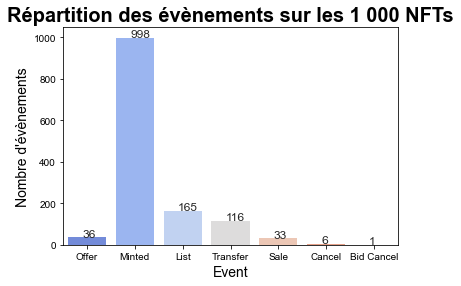

In [7]:
# Résultat avec la base comprenant les doublons
event_type_chart = sns.countplot(data=df_transac_hist, x="Event", palette="coolwarm")
without_hue(
    event_type_chart, 
    df_transac_hist["Event"], 
    "Répartition des évènements sur les 1 000 NFTs", 
    "Event", 
    x_axis_rotation=0
)

In [8]:
# - On va procéder à un nettoyage de la base de données pour ceux qui ont réalisé 
# dans la même journée la même offre au même montant pour éviter les mauvaises interprétations
df_transac_hist_nodup = df_transac_hist.drop_duplicates()

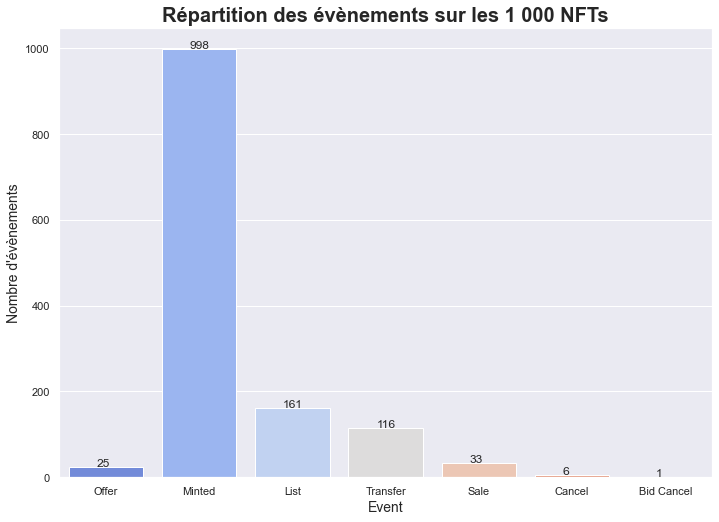

In [9]:
# Résultat avec la base sans les doublons
event_type_chart = sns.countplot(data=df_transac_hist_nodup, x="Event", palette="coolwarm")
without_hue(
    event_type_chart, 
    df_transac_hist_nodup["Event"], 
    "Répartition des évènements sur les 1 000 NFTs", 
    "Event", 
    x_axis_rotation=0
)

In [10]:
# Quel est le prix moyen d'une mise à la vente d'un NFT ?

# 1 - Calcul du prix moyen de mise en vente global
prix_moyen_enchere_global = df_transac_hist_nodup.where(df_transac_hist_nodup["Event"] == "List").groupby(["Event"])["Price"].mean()
prix_median_enchere_global = df_transac_hist_nodup.where(df_transac_hist_nodup["Event"] == "List").groupby(["Event"])["Price"].median()
print(prix_moyen_enchere_global)
print(prix_median_enchere_global)

Event
List    0.580524
Name: Price, dtype: float64
Event
List    0.29
Name: Price, dtype: float64


In [11]:
# Quel est le top 3 des NFT qui ont reçu le plus d'offre ?
df_offer = df_transac_hist_nodup.where(df_transac_hist_nodup["Event"] == "Offer").groupby(["TokenID"]).agg({"Price" : ["mean", "median", "count"]})
df_offer[('Price', 'mean')] = df_offer[('Price', 'mean')].map('{:,.2f} ETH'.format)
df_offer[('Price', 'median')] = df_offer[('Price', 'median')].map('{:,.2f} ETH'.format)
df_offer.sort_values(by=[('Price', 'count')], ascending=False)

Price                
             mean    median count
TokenID                          
130.0    0.92 ETH  0.93 ETH     4
745.0    0.98 ETH  1.00 ETH     4
576.0    0.94 ETH  1.00 ETH     3
711.0    0.22 ETH  0.22 ETH     2
1.0      0.25 ETH  0.25 ETH     1
384.0    0.15 ETH  0.15 ETH     1
419.0    0.04 ETH  0.04 ETH     1
463.0    0.20 ETH  0.20 ETH     1
466.0    0.00 ETH  0.00 ETH     1
506.0    0.15 ETH  0.15 ETH     1
734.0    0.10 ETH  0.10 ETH     1
735.0    0.11 ETH  0.11 ETH     1
749.0    0.12 ETH  0.12 ETH     1
783.0    0.15 ETH  0.15 ETH     1
926.0    0.11 ETH  0.11 ETH     1
927.0    0.11 ETH  0.11 ETH     1

In [12]:
# Quel est le top 3 des NFT qui sont le plus vendu ?
df_sale = df_transac_hist_nodup.where(df_transac_hist_nodup["Event"] == "Sale").groupby(["TokenID"]).agg({"Price" : ["mean", "median", "count"]})
df_sale[('Price', 'mean')] = df_sale[('Price', 'mean')].map('{:,.2f} ETH'.format)
df_sale[('Price', 'median')] = df_sale[('Price', 'median')].map('{:,.2f} ETH'.format)
df_sale.sort_values(by=[('Price', 'mean')], ascending=False)

Price                
             mean    median count
TokenID                          
180.0    0.40 ETH  0.40 ETH     1
188.0    0.39 ETH  0.39 ETH     1
56.0     0.38 ETH  0.38 ETH     1
370.0    0.38 ETH  0.38 ETH     1
242.0    0.35 ETH  0.35 ETH     1
711.0    0.24 ETH  0.24 ETH     1
76.0     0.23 ETH  0.23 ETH     1
494.0    0.21 ETH  0.21 ETH     1
723.0    0.21 ETH  0.21 ETH     1
537.0    0.20 ETH  0.20 ETH     1
357.0    0.20 ETH  0.20 ETH     1
293.0    0.19 ETH  0.19 ETH     1
62.0     0.19 ETH  0.19 ETH     1
947.0    0.19 ETH  0.19 ETH     1
273.0    0.19 ETH  0.19 ETH     1
149.0    0.19 ETH  0.19 ETH     1
348.0    0.18 ETH  0.18 ETH     1
228.0    0.18 ETH  0.18 ETH     1
882.0    0.18 ETH  0.18 ETH     1
645.0    0.18 ETH  0.18 ETH     1
157.0    0.17 ETH  0.17 ETH     1
692.0    0.17 ETH  0.17 ETH     1
661.0    0.17 ETH  0.17 ETH     1
630.0    0.17 ETH  0.17 ETH     1
616.0    0.17 ETH  0.17 ETH     1
87.0     0.17 ETH  0.17 ETH     1
126.0    0.17 ETH  0.17 ETH     1
608.0    0.16 ETH  0.16 ETH     1
568.0    0.16 ETH  0.16 ETH     1
870.0    0.16 ETH  0.16 ETH     1
118.0    0.16 ETH  0.16 ETH     1
475.0    0.15 ETH  0.15 ETH     1
915.0    0.14 ETH  0.14 ETH     1